# Bike Stores Data Analysis

Welcome to the bike stores data analysis project. In this project, the provided dataset is analyzed. At first, an initial exploration and data cleaning are done. Afterwards, hypothetical scenarios are introduced and queries are provided to answer the business questions.

## Initial Exploration and Data Cleaning

The schema below shows all the tables relevant for the bicycle shops with the relationships (zero or many to one, one to zero or one...) including the links. There are nine tables in total. It can be said that a lot of deep analysis can be done with this type of data set. Unfortunately, this is not possible with the available resources. However, hypotheses are made in this project, which should at least make use of all the tables.

The analysis could theoretically be done directly in PostgreSQL and screenshots could be provided. For showcase purposes, everything is done in Python. A connection to the SQLite DB and queries and their output are shown transparently. In the code below, the reader can see that the dataframes are not distinguished from each other and the name is always df. That can be done, since the output of each query is shown after each block of code.

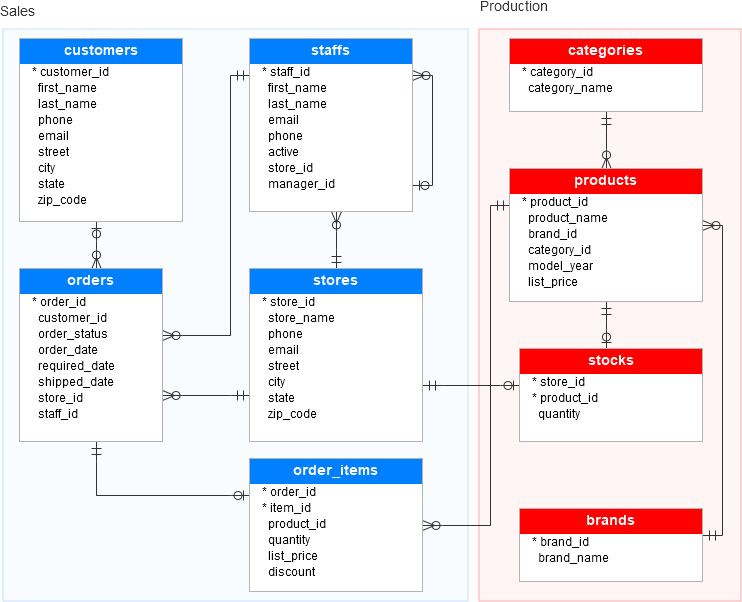

Import necessary libraries.

In [7]:
import sqlite3
import pandas as pd

Reading csv files using pandas in an alphabetical order.

In [9]:
brands = pd.read_csv('./brands.csv')
categories = pd.read_csv('./categories.csv')
customers = pd.read_csv('./customers.csv')
order_items = pd.read_csv('./order_items.csv')
orders = pd.read_csv('./orders.csv')
products = pd.read_csv('./products.csv')
staffs = pd.read_csv('./staffs.csv')
stocks = pd.read_csv('./stocks.csv')
stores = pd.read_csv('./stores.csv')

Creating a db using sqlite3 so that sql queries can be used later on.

In [11]:
connection = sqlite3.connect('bikes_project.db')

Populating 'bikes_project.db' with data from pandas dataframes.

In [13]:
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

The brands table has nine records and two fields. No data is missing.

In [15]:
query= """
SELECT *
FROM brands;
"""

brands = pd.read_sql_query(query, connection)
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


The data types of the respective fields are fitting well.

In [17]:
query= """
PRAGMA table_info(brands);
"""

brands_types = pd.read_sql_query(query, connection)
brands_types

,cid,name,type,notnull,dflt_value,pk
0,0,brand_id,INTEGER,0,None,0
1,1,brand_name,TEXT,0,None,0


The categories table has seven records and two fields. No data is missing.

In [19]:
query= """
SELECT *
FROM categories;
"""

categories = pd.read_sql_query(query, connection)
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


The data types of the respective fields are fitting well.

In [21]:
query= """
PRAGMA table_info(categories);
"""

categories_types = pd.read_sql_query(query, connection)
categories_types

,cid,name,type,notnull,dflt_value,pk
0,0,category_id,INTEGER,0,None,0
1,1,category_name,TEXT,0,None,0


The customer table has 1445 records and nine fields. On the first sight, it can be seen that the phone values are missing. In the next query, a scan is made to see, how many values are missing for the specific columns. 

In [23]:
query= """
SELECT *
FROM customers;
"""

customers_read = pd.read_sql_query(query, connection)
customers_read

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [24]:
query= """
SELECT 
    SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS customer_id_na,
    SUM(CASE WHEN first_name IS NULL THEN 1 ELSE 0 END) AS first_name_na,
    SUM(CASE WHEN last_name IS NULL THEN 1 ELSE 0 END) AS last_name_na,
    SUM(CASE WHEN phone IS NULL THEN 1 ELSE 0 END) AS phone_na,
    SUM(CASE WHEN email IS NULL THEN 1 ELSE 0 END) AS email_na,
    SUM(CASE WHEN street IS NULL THEN 1 ELSE 0 END) AS street_na,
    SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS city_na,
    SUM(CASE WHEN state IS NULL THEN 1 ELSE 0 END) AS state_na,
    SUM(CASE WHEN zip_code IS NULL THEN 1 ELSE 0 END) AS zip_code_na
FROM customers;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id_na,first_name_na,last_name_na,phone_na,email_na,street_na,city_na,state_na,zip_code_na
0,0,0,0,1267,0,0,0,0,0


The table needs to be updated. The 1267 missing values will be replaced with 'Unknown'. The replacement with 'Unknown' is done, since there is no way of choosing a default phone number. An aggregate value cannot be chosen to replace the values, since a phone number is a nominal value.

In [26]:
connection.execute("""
UPDATE customers
SET phone = 'Unknown'
WHERE phone IS NULL;
""")

connection.commit()

customers= customers_read = pd.read_sql_query("SELECT * FROM customers", connection)
customers

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,Unknown,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,Unknown,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,Unknown,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,Unknown,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,Unknown,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,Unknown,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,Unknown,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,Unknown,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


The data types of the respective fields are fitting well.

In [28]:
query= """
PRAGMA table_info(customers);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,customer_id,INTEGER,0,None,0
1,1,first_name,TEXT,0,None,0
2,2,last_name,TEXT,0,None,0
3,3,phone,TEXT,0,None,0
4,4,email,TEXT,0,None,0
5,5,street,TEXT,0,None,0
6,6,city,TEXT,0,None,0
7,7,state,TEXT,0,None,0
8,8,zip_code,INTEGER,0,None,0


The order items table has 4722 records and six fields. 

In [30]:
query= """
SELECT *
FROM order_items;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


Similarly to the previous table, the missing values need to be checked out, since there are 4722 records.

In [32]:
query= """
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS order_id_na,
    SUM(CASE WHEN item_id IS NULL THEN 1 ELSE 0 END) AS item_id_na,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS product_id_na,
    SUM(CASE WHEN quantity IS NULL THEN 1 ELSE 0 END) AS quantity_na,
    SUM(CASE WHEN list_price IS NULL THEN 1 ELSE 0 END) AS list_price_na,
    SUM(CASE WHEN discount IS NULL THEN 1 ELSE 0 END) AS discount_na
FROM order_items;
"""

df = pd.read_sql_query(query, connection)
df

,order_id_na,item_id_na,product_id_na,quantity_na,list_price_na,discount_na
0,0,0,0,0,0,0


The data types of the respective fields are fitting well.

In [34]:
query= """
PRAGMA table_info(order_items);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,INTEGER,0,None,0
1,1,item_id,INTEGER,0,None,0
2,2,product_id,INTEGER,0,None,0
3,3,quantity,INTEGER,0,None,0
4,4,list_price,REAL,0,None,0
5,5,discount,REAL,0,None,0


The orders table has 1615 records and eight fields.

In [36]:
query= """
SELECT *
FROM orders;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


Since, there are many records in the table, a check for NAs is done. As can be seen below, 170 values are missing in the shipped_date column.

In [38]:
query= """
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS order_id_na,
    SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS customer_id_na,
    SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS order_status_na,
    SUM(CASE WHEN order_date IS NULL THEN 1 ELSE 0 END) AS order_date_na,
    SUM(CASE WHEN required_date IS NULL THEN 1 ELSE 0 END) AS required_date_na,
    SUM(CASE WHEN shipped_date IS NULL THEN 1 ELSE 0 END) AS shipped_date_na,
    SUM(CASE WHEN store_id IS NULL THEN 1 ELSE 0 END) AS store_id_na,
    SUM(CASE WHEN staff_id IS NULL THEN 1 ELSE 0 END) AS staff_id_na
FROM orders;
"""

df = pd.read_sql_query(query, connection)
df

,order_id_na,customer_id_na,order_status_na,order_date_na,required_date_na,shipped_date_na,store_id_na,staff_id_na
0,0,0,0,0,0,170,0,0


In [39]:
query= """
PRAGMA table_info(orders);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,INTEGER,0,None,0
1,1,customer_id,INTEGER,0,None,0
2,2,order_status,INTEGER,0,None,0
3,3,order_date,TEXT,0,None,0
4,4,required_date,TEXT,0,None,0
5,5,shipped_date,TEXT,0,None,0
6,6,store_id,INTEGER,0,None,0
7,7,staff_id,INTEGER,0,None,0


In [40]:
connection.execute("DROP TABLE IF EXISTS orders_old;")

connection.execute("ALTER TABLE orders RENAME TO orders_old;")

connection.execute("""
UPDATE orders_old
SET shipped_date = '1900-01-01'
WHERE shipped_date IS NULL;
""")

connection.execute("""
CREATE TABLE orders (
    order_id INTEGER,
    customer_id INTEGER,
    order_status INTEGER, 
    order_date DATE,
    required_date DATE,
    shipped_date DATE,
    store_id INTEGER,
    staff_id INTEGER);
""")

connection.execute("""
INSERT INTO orders (order_id, customer_id, order_status, order_date, required_date, shipped_date, store_id, staff_id)
SELECT 
    order_id,
    customer_id,
    order_status,
    date(order_date) AS order_date,
    date(required_date) AS required_date,
    date(shipped_date) AS shipped_date,
    store_id,
    staff_id
FROM orders_old;
""")

connection.commit()

df= pd.read_sql_query("SELECT * FROM orders", connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,1900-01-01,2,7
1611,1612,3,3,2018-10-21,2018-10-21,1900-01-01,1,3
1612,1613,1,3,2018-11-18,2018-11-18,1900-01-01,2,6
1613,1614,135,3,2018-11-28,2018-11-28,1900-01-01,3,8


Doublecheck if types were correctly modified.

In [42]:
query= """
PRAGMA table_info(orders);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,order_id,INTEGER,0,None,0
1,1,customer_id,INTEGER,0,None,0
2,2,order_status,INTEGER,0,None,0
3,3,order_date,DATE,0,None,0
4,4,required_date,DATE,0,None,0
5,5,shipped_date,DATE,0,None,0
6,6,store_id,INTEGER,0,None,0
7,7,staff_id,INTEGER,0,None,0


The products column has 321 records and 6 fields.

In [44]:
query= """
SELECT *
FROM products;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


It can be seen that there are no missing values.

In [46]:
query= """
SELECT 
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS product_id_na,
    SUM(CASE WHEN product_name IS NULL THEN 1 ELSE 0 END) AS product_name_na,
    SUM(CASE WHEN brand_id IS NULL THEN 1 ELSE 0 END) AS brand_id_na,
    SUM(CASE WHEN category_id IS NULL THEN 1 ELSE 0 END) AS category_id_na,
    SUM(CASE WHEN model_year IS NULL THEN 1 ELSE 0 END) AS model_year_na,
    SUM(CASE WHEN list_price IS NULL THEN 1 ELSE 0 END) AS list_price_na
FROM products;
"""

df = pd.read_sql_query(query, connection)
df

,product_id_na,product_name_na,brand_id_na,category_id_na,model_year_na,list_price_na
0,0,0,0,0,0,0


The data types of the respective fields are fitting well.

In [48]:
query= """
PRAGMA table_info(products);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,product_id,INTEGER,0,None,0
1,1,product_name,TEXT,0,None,0
2,2,brand_id,INTEGER,0,None,0
3,3,category_id,INTEGER,0,None,0
4,4,model_year,INTEGER,0,None,0
5,5,list_price,REAL,0,None,0


In [49]:
query= """
SELECT *
FROM staffs;
"""

df = pd.read_sql_query(query, connection)
df

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


When the data types are investigated, it can be said that the data types look correct besides the manager_id column, which is a REAL, but could be changed to INTEGER. SQLite doesn't support single column adjustments, so the process of changing the type must be done in a similar manner as for the dates in the orders table. Since the REAL value can also be interpreted, the type will be kept as it is.

In [51]:
query= """
PRAGMA table_info(staffs);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,staff_id,INTEGER,0,None,0
1,1,first_name,TEXT,0,None,0
2,2,last_name,TEXT,0,None,0
3,3,email,TEXT,0,None,0
4,4,phone,TEXT,0,None,0
5,5,active,INTEGER,0,None,0
6,6,store_id,INTEGER,0,None,0
7,7,manager_id,REAL,0,None,0


The quantity table has 939 records and three fields.

In [53]:
query= """
SELECT *
FROM stocks;
"""

df = pd.read_sql_query(query, connection)
df

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


There are no missing values.

In [55]:
query= """
SELECT 
    SUM(CASE WHEN store_id IS NULL THEN 1 ELSE 0 END) AS store_id_na,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS product_id_na,
    SUM(CASE WHEN quantity IS NULL THEN 1 ELSE 0 END) AS quantity_na
FROM stocks;
"""

df = pd.read_sql_query(query, connection)
df

,store_id_na,product_id_na,quantity_na
0,0,0,0


The data types of the respective fields are fitting well.

In [57]:
query= """
PRAGMA table_info(stocks);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,store_id,INTEGER,0,None,0
1,1,product_id,INTEGER,0,None,0
2,2,quantity,INTEGER,0,None,0


Last but not least, the stores table has three records and eight fields.

In [59]:
query= """
SELECT *
FROM stores;
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


The data types of the respective fields are fitting well.

In [61]:
query= """
PRAGMA table_info(stores);
"""

df = pd.read_sql_query(query, connection)
df

,cid,name,type,notnull,dflt_value,pk
0,0,store_id,INTEGER,0,None,0
1,1,store_name,TEXT,0,None,0
2,2,phone,TEXT,0,None,0
3,3,email,TEXT,0,None,0
4,4,street,TEXT,0,None,0
5,5,city,TEXT,0,None,0
6,6,state,TEXT,0,None,0
7,7,zip_code,INTEGER,0,None,0


## Business Cases

For all the cases below, it can be imagined that I am the CEO of all the three bike stores. I have come up with a few business questions. Since I have experience with SQL queries, I will write them by myself and answer my own questions.

Let's imagine a situation where I want to investigate the average delivery time of all completed orders per store. I also want to take a look at the amount of late orders. If an order is late then I want a specific member of my staff to reach out to the customer and offer him/her a compensation or a possible discount on the next order.

In the first step I want to take a look at the average delivery time per store to have a general overview.

In [65]:
query= """
SELECT 
    s.store_name,
    AVG((JULIANDAY(shipped_date) - JULIANDAY(order_date))) AS avg_delivery_time
FROM orders AS o
LEFT JOIN stores AS s
    USING (store_id)
WHERE order_status = 4
GROUP BY s.store_name
ORDER BY avg_delivery_time DESC;
"""
df = pd.read_sql_query(query, connection)
df

,store_name,avg_delivery_time
0,Santa Cruz Bikes,2.045775
1,Baldwin Bikes,1.972522
2,Rowlett Bikes,1.922535


I want to also take a look at the exact amount of later orders per store. It is important to stress out that the number of late orders does not equal to bad performance. The respective stores can have different amounts of orders. It is important to see the relative amount of late orders. It can be said that the Santa Cruz Bikes store has relatively the most late orders.

In [67]:
query= """
WITH order_count AS 
    (SELECT store_id, COUNT (*) AS total_orders
     FROM orders
     WHERE order_status = 4
     GROUP BY store_id)

SELECT 
    store_name,
    total_orders,
    COUNT(*) AS late_orders,
    ROUND((COUNT(*)*1.00/oc.total_orders*1.00)*100, 2) AS perc_late   
FROM orders AS o
LEFT JOIN stores AS s
    USING (store_id)
LEFT JOIN order_count AS oc
    USING (store_id)
WHERE order_status = 4 AND (JULIANDAY(required_date) - JULIANDAY(shipped_date)) < 0
GROUP BY (store_name)
ORDER BY perc_late DESC;
"""
df = pd.read_sql_query(query, connection)
df

,store_name,total_orders,late_orders,perc_late
0,Santa Cruz Bikes,284,104,36.62
1,Baldwin Bikes,1019,317,31.11
2,Rowlett Bikes,142,37,26.06


Building up on the previous analysis, I can extract all the completed orders with delayed deliveries. Afterwards, I can query the full names and e-mail addresses so that the specific employees know who to reach out to.

It is a real case that loyal customers got delayed deliveries. For those customers, a bigger discount needs to be issued. However, as can be seen below, there are no customers who had more than one complete order and their order got delayed.

In [69]:
query = """
SELECT 
    s.store_name, 
    o.order_id,
    o.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    c.email AS customer_email,
    st.first_name || ' ' || st.last_name AS responsible_staff,
    st.email AS staff_email
FROM orders AS o
LEFT JOIN stores AS s
    USING (store_id)
LEFT JOIN customers AS c 
    USING (customer_id)
LEFT JOIN staffs AS st 
    USING (staff_id)
WHERE 
    order_status = 4 AND (JULIANDAY(required_date) - JULIANDAY(shipped_date)) < 0 
    AND o.customer_id IN (
        SELECT customer_id
        FROM orders
        WHERE order_status = 4 AND (JULIANDAY(required_date) - JULIANDAY(shipped_date)) < 0
        GROUP BY customer_id
            HAVING COUNT(customer_id) > 1)
ORDER BY s.store_name;
"""

df = pd.read_sql_query(query, connection)
df

,store_name,order_id,customer_id,customer_name,customer_email,responsible_staff,staff_email


Below, a list of users can be seen, so that the staff can send the discout e-mails. Based on the list provided above, I can say that customers with delayed orders never had more than one completed order.

In [71]:
query = """
SELECT 
    s.store_name, 
    o.order_id,
    o.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    c.email AS customer_email,
    st.first_name || ' ' || st.last_name AS responsible_staff,
    st.email AS staff_email
FROM orders AS o
LEFT JOIN stores AS s
    USING (store_id)
LEFT JOIN customers AS c
    USING (customer_id)
LEFT JOIN staffs AS st
    USING (staff_id)
WHERE order_status = 4 
    AND (JULIANDAY(required_date) - JULIANDAY(shipped_date)) < 0 
    AND st.active = 1
    AND o.customer_id IN (
        SELECT customer_id
        FROM orders
        WHERE order_status = 4 AND (JULIANDAY(required_date) - JULIANDAY(shipped_date)) < 0
        GROUP BY customer_id
            HAVING COUNT(customer_id) = 1)
ORDER BY s.store_name;
"""

df = pd.read_sql_query(query, connection)
df

,store_name,order_id,customer_id,customer_name,customer_email,responsible_staff,staff_email
0,Baldwin Bikes,15,450,Ellsworth Michael,ellsworth.michael@yahoo.com,Venita Daniel,venita.daniel@bikes.shop
1,Baldwin Bikes,21,1250,Neoma Daugherty,neoma.daugherty@gmail.com,Marcelene Boyer,marcelene.boyer@bikes.shop
2,Baldwin Bikes,28,252,Eleni Gordon,eleni.gordon@hotmail.com,Marcelene Boyer,marcelene.boyer@bikes.shop
3,Baldwin Bikes,42,1095,Corene Swanson,corene.swanson@aol.com,Venita Daniel,venita.daniel@bikes.shop
4,Baldwin Bikes,43,1434,Elana Miles,elana.miles@yahoo.com,Venita Daniel,venita.daniel@bikes.shop
...,...,...,...,...,...,...,...
453,Santa Cruz Bikes,1376,1186,Kiesha Bond,kiesha.bond@aol.com,Mireya Copeland,mireya.copeland@bikes.shop
454,Santa Cruz Bikes,1386,1254,Dung Reid,dung.reid@msn.com,Mireya Copeland,mireya.copeland@bikes.shop
455,Santa Cruz Bikes,1417,300,Rayford Simon,rayford.simon@msn.com,Mireya Copeland,mireya.copeland@bikes.shop
456,Santa Cruz Bikes,1473,302,Hayden Cross,hayden.cross@gmail.com,Mireya Copeland,mireya.copeland@bikes.shop


In [72]:
query = """
SELECT 
    s.store_name, 
    o.order_id,
    o.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    c.email AS customer_email,
    st.first_name || ' ' || st.last_name AS responsible_staff,
    st.email AS staff_email
FROM orders AS o
LEFT JOIN stores AS s 
    USING (store_id)
LEFT JOIN customers AS c 
    USING (customer_id)
LEFT JOIN staffs AS st 
    USING (staff_id)
WHERE o.customer_id IN (
    SELECT customer_id
    FROM orders
    GROUP BY customer_id
        HAVING COUNT(customer_id) > 1)
    AND order_status = 4 
ORDER BY s.store_name;
"""

df = pd.read_sql_query(query, connection)
df

,store_name,order_id,customer_id,customer_name,customer_email,responsible_staff,staff_email
0,Baldwin Bikes,6,94,Sharyn Hopkins,sharyn.hopkins@hotmail.com,Marcelene Boyer,marcelene.boyer@bikes.shop
1,Baldwin Bikes,27,57,Pamala Henry,pamala.henry@aol.com,Venita Daniel,venita.daniel@bikes.shop
2,Baldwin Bikes,34,80,Sarai Mckee,sarai.mckee@msn.com,Marcelene Boyer,marcelene.boyer@bikes.shop
3,Baldwin Bikes,104,7,Latasha Hays,latasha.hays@hotmail.com,Venita Daniel,venita.daniel@bikes.shop
4,Baldwin Bikes,108,12,Robby Sykes,robby.sykes@hotmail.com,Marcelene Boyer,marcelene.boyer@bikes.shop
...,...,...,...,...,...,...,...
126,Santa Cruz Bikes,1275,165,Jeromy Burch,jeromy.burch@msn.com,Mireya Copeland,mireya.copeland@bikes.shop
127,Santa Cruz Bikes,1296,231,Jenee Rasmussen,jenee.rasmussen@hotmail.com,Genna Serrano,genna.serrano@bikes.shop
128,Santa Cruz Bikes,1321,217,Carline Collier,carline.collier@msn.com,Genna Serrano,genna.serrano@bikes.shop
129,Santa Cruz Bikes,1411,109,Monica Sears,monica.sears@aol.com,Mireya Copeland,mireya.copeland@bikes.shop


I am also interested in the total revenues of all the stores. As can be seen below, the discount is written as a percent. That is not optimal for the calculations and an adjustment needs to be done. It would be interesting to know the production costs of the specific bikes. However, as we can see, the list price from the products table is the same as the one in the order items table. Therefore, only the revenue can be calculated.

In [74]:
query= """
SELECT 
    o.order_id,
    i.quantity,
    i.list_price AS order_list_price,
    i.discount,
    p.list_price AS product_list_price,
    s.store_name
FROM orders AS o
INNER JOIN order_items AS i
    USING (order_id)
LEFT JOIN products as p
    USING (product_id)
LEFT JOIN stores AS s
    USING (store_id);
"""

df = pd.read_sql_query(query, connection)
df

,order_id,quantity,order_list_price,discount,product_list_price,store_name
0,1,1,2899.99,0.20,2899.99,Santa Cruz Bikes
1,1,2,1799.99,0.07,1799.99,Santa Cruz Bikes
2,1,2,1549.00,0.05,1549.00,Santa Cruz Bikes
3,1,2,599.99,0.05,599.99,Santa Cruz Bikes
4,1,1,599.99,0.20,599.99,Santa Cruz Bikes
...,...,...,...,...,...,...
4717,1614,2,2299.99,0.07,2299.99,Rowlett Bikes
4718,1614,2,269.99,0.20,269.99,Rowlett Bikes
4719,1615,1,2499.99,0.20,2499.99,Rowlett Bikes
4720,1615,2,2299.99,0.20,2299.99,Rowlett Bikes


A new column was created to get a number that can be used as a multiplicator to derive the final price. Furthermore, the profit column will be made, which is a result of multiplying list_price, quantity and multiplicator. Lastly, a grouping operation is done so that one can see the total revenue per store.

In [76]:
query= """
SELECT 
    s.store_name,
    SUM(ROUND(quantity*list_price*(1-discount),2)) AS total_revenue
FROM orders AS o
INNER JOIN order_items AS i
    USING (order_id)
LEFT JOIN stores AS s
    USING (store_id)
GROUP BY store_name
ORDER BY total_revenue DESC;
"""

df = pd.read_sql_query(query, connection)
df

,store_name,total_revenue
0,Baldwin Bikes,5215746.64
1,Santa Cruz Bikes,1605821.56
2,Rowlett Bikes,867541.51


I am interested in models, which are most sold. It is not enough for me to see the product_id, which could be done solely by using the order_items table. I want to see the exact product name, category and brand. Therefore, I need to connect multiple tables at once to see the result.

In [78]:
query= """
SELECT 
    p.product_id,
    p.product_name,
    c.category_name,
    b.brand_name,
    SUM(i.quantity) AS quantity
FROM order_items AS i
LEFT JOIN products AS p
    USING (product_id)
LEFT JOIN categories AS c
    USING (category_id)
LEFT JOIN brands as b
    USING (brand_id)
GROUP BY p.product_name
ORDER BY quantity DESC
LIMIT 10;
"""
df = pd.read_sql_query(query, connection)
df

,product_id,product_name,category_name,brand_name,quantity
0,13,Electra Cruiser 1 (24-Inch) - 2016,Cruisers Bicycles,Electra,296
1,16,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,290
2,12,Electra Townie Original 21D - 2016,Cruisers Bicycles,Electra,289
3,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Children Bicycles,Electra,269
4,6,Surly Ice Cream Truck Frameset - 2016,Mountain Bikes,Surly,167
5,7,Trek Slash 8 27.5 - 2016,Mountain Bikes,Trek,154
6,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Children Bicycles,Electra,154
7,11,Surly Straggler 650b - 2016,Cyclocross Bicycles,Surly,151
8,25,Electra Townie Original 7D - 2015/2016,Comfort Bicycles,Electra,148
9,10,Surly Straggler - 2016,Cyclocross Bicycles,Surly,147


Those were the most sold items across the stores. It would now be interesting to see if there are differences of the top three most sold tems between the stores.

Taking a look at the result below, these are the most sold bikes:

Baldwin Bikes - Surly Ice Cream Truck Frameset - 2016	
Rowlett Bikes - Electra Cruiser 1 (24-Inch) - 2016	
Santa Cruz Biukes - Electra Moto 1 - 2016

In [80]:
query= """
SELECT 
    store_name, 
    product_id, 
    product_name, 
    category_name, 
    brand_name, 
    quantity
FROM (SELECT 
        s.store_name, 
        p.product_id, 
        p.product_name, 
        c.category_name, 
        b.brand_name, 
        SUM(i.quantity) AS quantity,
        ROW_NUMBER() OVER (PARTITION BY s.store_name ORDER BY SUM(i.quantity) DESC) AS rank
    FROM order_items AS i
    LEFT JOIN orders AS o 
        USING (order_id)
    LEFT JOIN stores AS s
        USING (store_id)
    LEFT JOIN products AS p
        USING (product_id)
    LEFT JOIN categories AS c
        USING (category_id)
    LEFT JOIN brands AS b
        USING (brand_id)
    GROUP BY s.store_name, p.product_id, p.product_name, c.category_name, b.brand_name) AS ranked
WHERE rank <= 3
ORDER BY store_name, quantity DESC;
"""
df = pd.read_sql_query(query, connection)
df

,store_name,product_id,product_name,category_name,brand_name,quantity
0,Baldwin Bikes,6,Surly Ice Cream Truck Frameset - 2016,Mountain Bikes,Surly,113
1,Baldwin Bikes,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Children Bicycles,Electra,111
2,Baldwin Bikes,13,Electra Cruiser 1 (24-Inch) - 2016,Cruisers Bicycles,Electra,107
3,Rowlett Bikes,13,Electra Cruiser 1 (24-Inch) - 2016,Cruisers Bicycles,Electra,24
4,Rowlett Bikes,4,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,21
5,Rowlett Bikes,7,Trek Slash 8 27.5 - 2016,Mountain Bikes,Trek,21
6,Santa Cruz Bikes,15,Electra Moto 1 - 2016,Cruisers Bicycles,Electra,50
7,Santa Cruz Bikes,9,Trek Conduit+ - 2016,Electric Bikes,Trek,39
8,Santa Cruz Bikes,11,Surly Straggler 650b - 2016,Cyclocross Bicycles,Surly,38


I want to make sure that there are enough most-sold items in the stock. The result of the query below shows, which bikes must be reordered and for which stores. I decided that I want to have at least six "popular bikes" in the stock per each stock. A popular bike is defined as as bike that belongs to the top ten most sold bikes for the respective shop.

In [82]:
query= """
WITH top_bikes_shop AS (
    SELECT 
        s.store_id,
        s.store_name, 
        p.product_id, 
        p.product_name, 
        c.category_name, 
        b.brand_name, 
        SUM(i.quantity) AS quantity,
        ROW_NUMBER() OVER (PARTITION BY s.store_name ORDER BY SUM(i.quantity) DESC) AS rank
    FROM 
        order_items AS i
    LEFT JOIN 
        orders AS o USING (order_id)
    LEFT JOIN 
        stores AS s USING (store_id)
    LEFT JOIN 
        products AS p USING (product_id)
    LEFT JOIN 
        categories AS c USING (category_id)
    LEFT JOIN 
        brands AS b USING (brand_id)
    GROUP BY s.store_id, s.store_name, p.product_id, p.product_name, c.category_name, b.brand_name)

SELECT 
    cte.store_name, 
    st.product_id, 
    cte.product_name,  
    st.quantity AS stock_quantity,
    (6 - st.quantity) AS to_order
FROM 
    stocks AS st
INNER JOIN (SELECT * FROM top_bikes_shop WHERE rank <= 10) AS cte
    ON st.store_id = cte.store_id AND st.product_id = cte.product_id
WHERE st.quantity <= 6
ORDER BY cte.store_name, cte.quantity DESC;
"""

df = pd.read_sql_query(query, connection)
df

,store_name,product_id,product_name,stock_quantity,to_order
0,Baldwin Bikes,13,Electra Cruiser 1 (24-Inch) - 2016,1,5
1,Baldwin Bikes,12,Electra Townie Original 21D - 2016,2,4
2,Rowlett Bikes,3,Surly Wednesday Frameset - 2016,0,6
3,Rowlett Bikes,18,Pure Cycles Western 3-Speed - Women's - 2015/2016,5,1
4,Santa Cruz Bikes,15,Electra Moto 1 - 2016,3,3
5,Santa Cruz Bikes,2,Ritchey Timberwolf Frameset - 2016,5,1
6,Santa Cruz Bikes,3,Surly Wednesday Frameset - 2016,6,0
7,Santa Cruz Bikes,6,Surly Ice Cream Truck Frameset - 2016,0,6
8,Santa Cruz Bikes,8,Trek Remedy 29 Carbon Frameset - 2016,0,6


Next up, it would be wise to see, which bikes have been sold only once or less. For some reason, only models from 2008 have low sales. Theoretically, one could say that the newest models should have the lowest sales, since they are freshly on the market. However, the newest model is from 2019. One should consider whether to remove them from the market or not.

In [84]:
query= """
SELECT 
    p.product_name,
    p.model_year, SUM(o.quantity) AS quantity,
    (SELECT MIN(model_year) FROM products) AS oldest_model, 
    (SELECT MAX(model_year) FROM products) AS newest_model
FROM order_items AS o
LEFT JOIN products AS p
    USING (product_id)
GROUP BY product_name
    HAVING SUM(o.quantity) <= 1
ORDER BY quantity
"""

df = pd.read_sql_query(query, connection)
df

,product_name,model_year,quantity,oldest_model,newest_model
0,Electra Amsterdam Royal 8i - 2017/2018,2018,1,2016,2019
1,Electra Cruiser 1 Tall - 2016/2018,2018,1,2016,2019
2,Electra Cruiser 7D - 2016/2017/2018,2018,1,2016,2019
3,Electra Soft Serve 1 (16-inch) - Girl's - 2018,2018,1,2016,2019
4,Electra Straight 8 1 (16-inch) - Boy's - 2018,2018,1,2016,2019
5,Electra Straight 8 1 (20-inch) - Boy's - 2018,2018,1,2016,2019
6,"Electra Superbolt 3i 20"" - 2018",2018,1,2016,2019
7,Electra Tiger Shark 3i (20-inch) - Boys' - 2018,2018,1,2016,2019
8,"Electra Treasure 3i 20"" - 2018",2018,1,2016,2019
9,Surly ECR Frameset - 2018,2018,1,2016,2019


I plan to run a promotion for each bike store during its peak order month. Although I expected popular months to vary significantly, April is the top month for all three stores. Therefore, the promotion will run in April.

Baldwin Bikes’ top month is March, but it has only one more order than April. Rowlett Bikes has two peak months: March and April.

In [86]:
query= """
WITH monthly_order_counts AS (
    SELECT 
        s.store_name,
        CAST(strftime('%m', o.order_date) AS INTEGER) AS month,
        COUNT(o.order_id) AS order_count
    FROM orders AS o
    INNER JOIN stores AS s
        USING (store_id)
    GROUP BY s.store_name, month),

ranked_months AS (
    SELECT 
        store_name, 
        month, 
        order_count,
        ROW_NUMBER() OVER (PARTITION BY store_name ORDER BY order_count DESC) AS rank
    FROM monthly_order_counts)

SELECT 
    store_name, 
    month, 
    order_count
FROM ranked_months
WHERE rank <= 3
ORDER BY store_name, order_count DESC;
"""
df = pd.read_sql_query(query, connection)
df

,store_name,month,order_count
0,Baldwin Bikes,3,133
1,Baldwin Bikes,4,132
2,Baldwin Bikes,1,102
3,Rowlett Bikes,3,23
4,Rowlett Bikes,4,23
5,Rowlett Bikes,8,21
6,Santa Cruz Bikes,4,70
7,Santa Cruz Bikes,1,37
8,Santa Cruz Bikes,3,34
